In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
with open('spam.csv', 'r', encoding='utf-8', errors='ignore') as f:
    df = pd.read_csv(f)

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Error with opening the spam.csv file because it had error with encoding so opening the file with encoding utf-8 and ignoring all error.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


As we see three column which is unnamed and this columns has value which is incomplete.

### 1.Data Cleaning

In [4]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [5]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [6]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
df['target'] = le.fit_transform(df['target'])

In [9]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.shape

(5572, 2)

There are 5572 rows or date and their are 2 columns

### Missing Values

In [11]:
df.isnull().sum()

target    0
text      0
dtype: int64

There is no null values in the dataset.

In [12]:
df.duplicated().sum()

404

So, there is 404 duplicate value in our dataset. So it will effect our model, so deleting it would be better.

In [13]:
df= df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

So duplicate value is been taken care.

In [15]:
df.shape

(5168, 2)

### 2.EDA

In [16]:
df.sample(6)

,target,text
5273,0,Its too late:)but its k.wish you the same.
5392,0,Ooooooh I forgot to tell u I can get on yovill...
4315,0,"I can't speak, bcaz mobile have problem. I can..."
3716,0,I'm gonna rip out my uterus.
804,0,K I'll be there before 4.
2925,0,Im done. Just studyn in library


In [17]:
df.target.value_counts()

0    4516
1     652
Name: target, dtype: int64

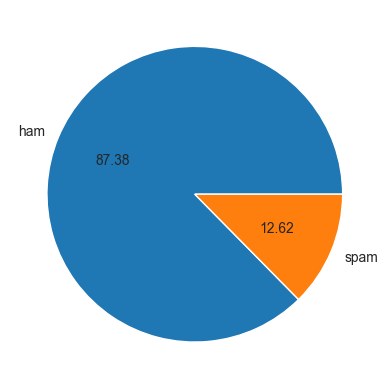

In [18]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f");

By this plot we can make that the data is imbalanced which is again not good for the model, so precession should be high for this use case.

In [19]:
# pip install nltk --quiet

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DEERAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Downloading punkt whaich is a tokenizer model that helps split a given text into sentences and words.

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DEERAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Downloading stopwords, it refers to a collection of a common word that has to be filtered out during text processing

In [23]:
from nltk.corpus import stopwords

Here imported stopwords from nltk corpus

In [24]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    159
5568     36
5569     57
5570    125
5571     26
Name: text, Length: 5168, dtype: int64

Took length of the text in each row and adding it as column in data.

In [25]:
df['characters'] = df['text'].apply(len)
df.head()

,target,text,characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
df['text'].apply(lambda x : nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, _, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5168, dtype: object

Here each words are tokenized, each word is seperated.

In [27]:
df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5168, dtype: int64

This is words in each sentence which will be added in column.

In [28]:
df['words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))
df.head()

,target,text,characters,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['text'].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568               [Will _ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5168, dtype: object

This will tokenize the whole text into sentence.

In [30]:
df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5168, dtype: int64

In [31]:
df['sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df[['characters', 'words', 'sentences']].describe()

,characters,words,sentences
count,5168.000000,5168.000000,5168.000000
mean,78.759481,18.441176,1.966331
std,58.104099,13.327587,1.449367
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


### Ham Statistical Descreption

In [33]:
df[df['target']==0][['characters','words','sentences']].describe()

,characters,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.344110,17.108946,1.819973
std,56.328803,13.494730,1.383228
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


### Spam Statistical Descreption

In [34]:
df[df['target']==1][['characters','words','sentences']].describe()

,characters,words,sentences
count,652.000000,652.000000,652.000000
mean,137.047546,27.668712,2.980061
std,29.937352,7.015283,1.491780
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,156.000000,32.000000,4.000000
max,222.000000,46.000000,9.000000


In [35]:
new_df= [['characters', 'words', 'sentences']]

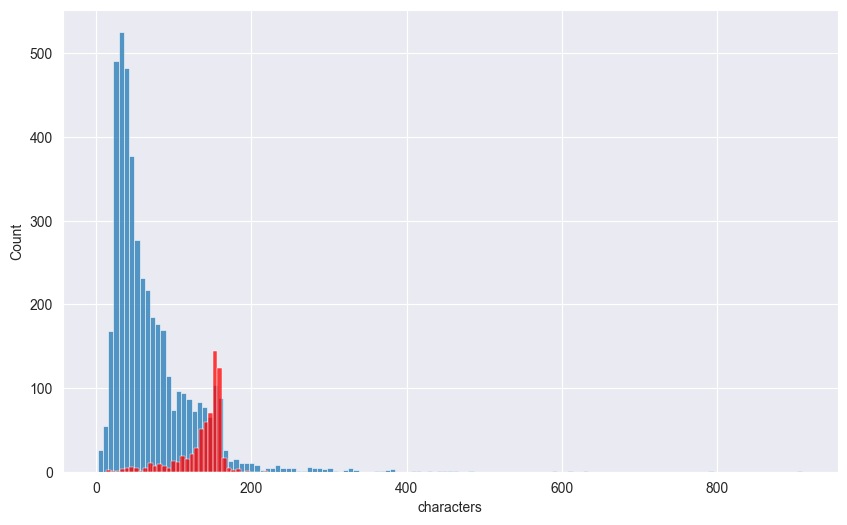

In [36]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target']==0]['characters'])
sns.histplot(df[df['target']==1]['characters'],color='red')
plt.show()

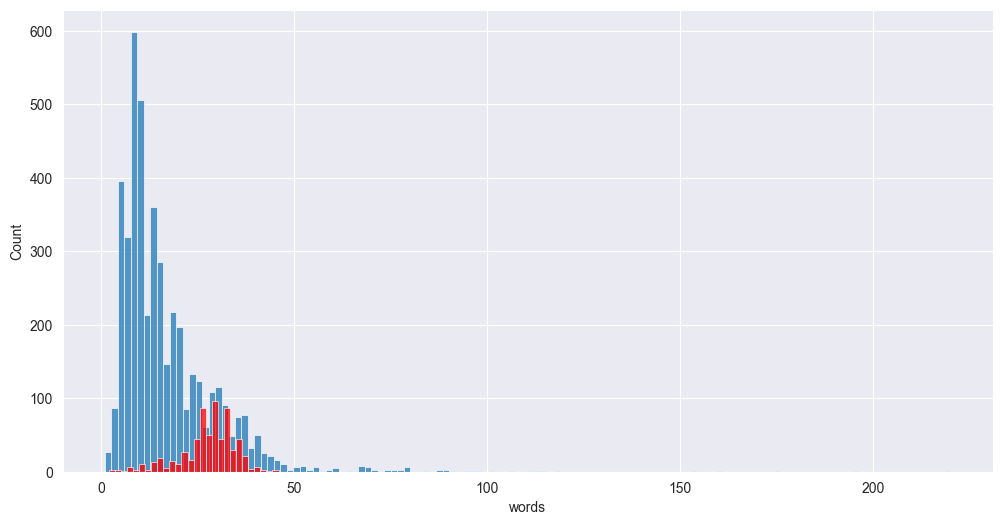

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['words'])
sns.histplot(df[df['target']==1]['words'],color='red')
plt.show()

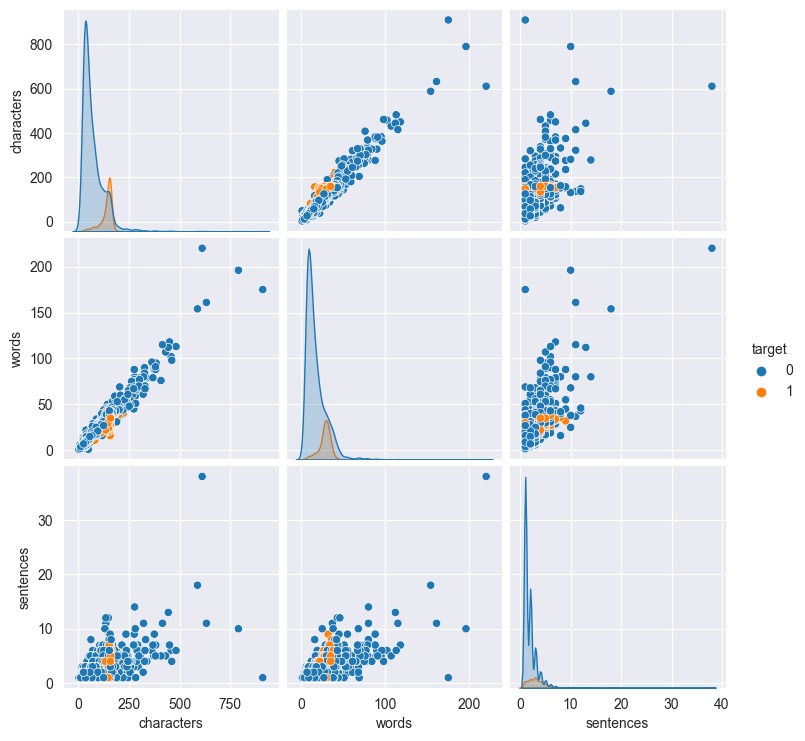

In [38]:
sns.pairplot(df,hue='target');

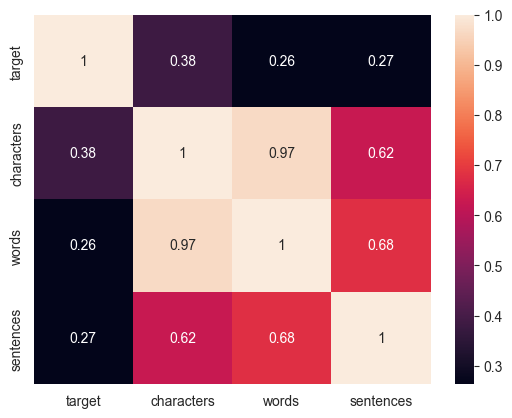

In [39]:
sns.heatmap(df.corr(),annot=True);

### 3.Data Preprocessing

Well we have to import string so that we can lower case all the word, tokenize each word, remove special characters, remove stop words and punctuation and stemming.

In [40]:
import string

In [41]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Checking all punctuation marks are present in string's punctuation library.

In [42]:
from nltk.stem.porter import PorterStemmer

In [43]:
ps = PorterStemmer()
ps.stem('moving')

'move'

This is what stem does bring the word to it's root word, like this moving got converted to move.

Now to perform all the nltk preprocessing one-by-one we will create the function which will automate the whole process.

In [44]:
def pp_text(text):
    text = text.lower()         #Converting text to lower case
    text = nltk.word_tokenize(text) #Tokenizing words

    y = []
    for i in text:
        if i.isalnum():     #Removing special characters
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:   #Removing stop words and punctuation
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))  #Stemming

    return " ".join(y)

In [45]:
pp_text('In the world of data science, preprocessing plays a crucial role. Before any model can be built, data must be cleaned, transformed, and structured in a way that makes sense for machine learning algorithms. This often involves removing noise from the data, dealing with missing values, and normalizing different forms of data. Additionally, text data needs to be processed, which includes tokenization, stemming, and removing stopwords. For example, when working with natural language processing, stemming helps in reducing words to their root form, so that words like "running" and "ran" are treated as the same. Stopwords such as "the", "is", "and" are often removed because they do not add much meaning to the data. By cleaning the data in this way, models can focus on the important information, improving accuracy and reducing computational load. It is important to remember that every dataset is different. While one dataset might benefit from aggressive cleaning, another might require careful handling to preserve important information. Techniques like lemmatization can also be used instead of stemming when more accuracy is needed, as lemmatization considers the context of the word, providing a more accurate root form. In summary, data preprocessing is a foundational step in data science and machine learning. It helps to prepare raw data for analysis by removing irrelevant information and reducing the complexity of the dataset, thus allowing models to perform better. Without it, even the most advanced machine learning algorithms can struggle to produce meaningful results.')

'world data scienc preprocess play crucial role model built data must clean transform structur way make sens machin learn algorithm often involv remov nois data deal miss valu normal differ form data addit text data need process includ token stem remov stopword exampl work natur languag process stem help reduc word root form word like run ran treat stopword often remov add much mean data clean data way model focu import inform improv accuraci reduc comput load import rememb everi dataset differ one dataset might benefit aggress clean anoth might requir care handl preserv import inform techniqu like lemmat also use instead stem accuraci need lemmat consid context word provid accur root form summari data preprocess foundat step data scienc machin learn help prepar raw data analysi remov irrelev inform reduc complex dataset thu allow model perform better without even advanc machin learn algorithm struggl produc meaning result'

In [46]:
df['transformed_text'] = df['text'].apply(pp_text)

In [47]:
df.head()

,target,text,characters,words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
# pip install wordcloud --quiet

For visual wordcloud would be easy to see what words are been selected after all that preprocessing work using wordcloud.

In [49]:
from wordcloud import WordCloud
ham_wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

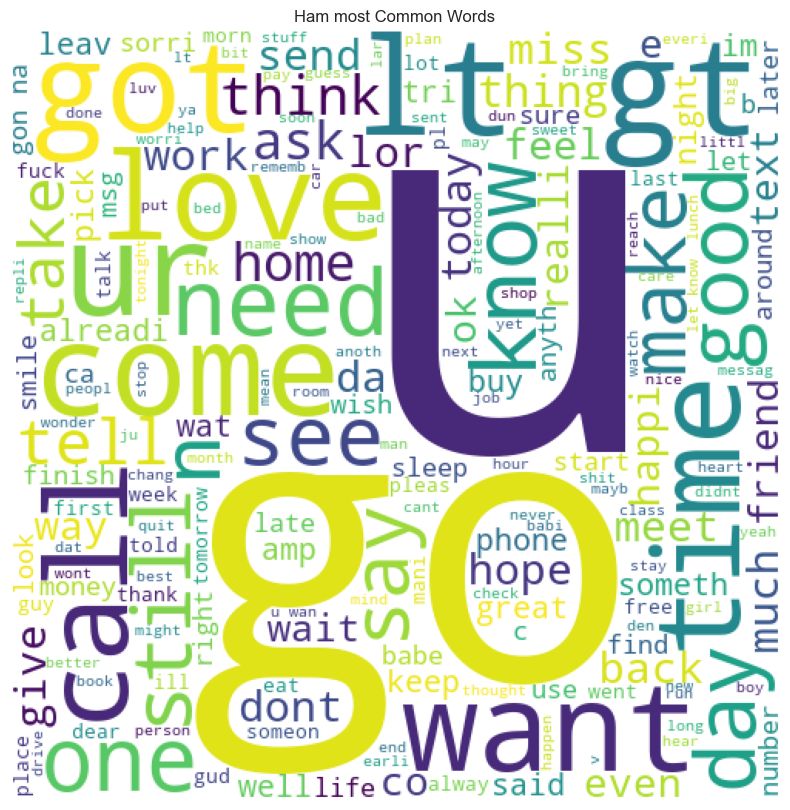

In [50]:
plt.figure(figsize=(26,10))
ham_wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=''))
plt.imshow(ham_wc)
plt.title('Ham most Common Words')
plt.axis('off')
plt.show()

This code block is building a corpus (a collection of words) from the spam messages in our dataset.

In [51]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [52]:
len(spam_corpus)

10106

### 4.Model Building

In [53]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [54]:
tf = TfidfVectorizer(max_features=3000)

In [55]:
X=tf.fit_transform(df['transformed_text']).toarray()

In [56]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
X.shape

(5168, 3000)

In [58]:
y = df['target'].values

In [59]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)

We will try Naive bayes algorithm works well.

In [60]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

Creating a function to automate the model building process.

In [61]:
def model_eval(y_true, y_pred):
    cfm=confusion_matrix(y_test,y_pred)
    print('Confusion Matrix \n',cfm)
 
    print("Classification report: ")
 
    print(classification_report(y_test,y_pred))
 
    acc=accuracy_score(y_test, y_pred)
    print("Accuracy of the model: ",acc)
    

In [62]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_test)

In [63]:
evaluation_result = model_eval(y_test,y_pred_gnb)
print(evaluation_result)

Confusion Matrix 
 [[770 128]
 [ 28 108]]
Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       898
           1       0.46      0.79      0.58       136

    accuracy                           0.85      1034
   macro avg       0.71      0.83      0.74      1034
weighted avg       0.90      0.85      0.86      1034

Accuracy of the model:  0.8491295938104448
None


So GaussianNB Model Gave accuracy score of 84.91% but if we see confusion matrix there are many missclassified prediction.

In [64]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
y_pred_mnb = mnb.predict(x_test)

In [65]:
evaluation_result = model_eval(y_test,y_pred_mnb)
print(evaluation_result)

Confusion Matrix 
 [[898   0]
 [ 32 104]]
Classification report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       898
           1       1.00      0.76      0.87       136

    accuracy                           0.97      1034
   macro avg       0.98      0.88      0.92      1034
weighted avg       0.97      0.97      0.97      1034

Accuracy of the model:  0.9690522243713733
None


Well MultinomialNB gave the accuracy score of 96.90% of accuracy score and class 0 has predicted all well.

In [66]:
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
y_pred_bnb=bnb.predict(x_test)

In [67]:
evaluation_result = model_eval(y_test,y_pred_bnb)
print(evaluation_result)

Confusion Matrix 
 [[896   2]
 [ 25 111]]
Classification report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       898
           1       0.98      0.82      0.89       136

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034

Accuracy of the model:  0.9738878143133463
None


BernoulliNB gave best prediction accurarcy score of 97.38% and the classes also didn't overfit.

#### Trying with Other Algorithms

In [68]:
# pip install xgboost --quiet

Now using different algorithms.

In [69]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from xgboost import XGBClassifier

In [70]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [71]:
clfs = {
    'SVC' : svc,
    'KNN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [72]:
def train_model(clf,X_train,X_test,y_train,y_test):  ##This function holds good for only binary classifications
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    F1_Score = 2*(recall * precision) / (recall + precision)
    return accuracy,precision,recall,F1_Score

In [73]:
train_model(mnb,x_train,x_test,y_train,y_test)

(0.9690522243713733, 1.0, 0.7647058823529411, 0.8666666666666666)

In [74]:
clfs.keys()

dict_keys(['SVC', 'KNN', 'NB', 'DT', 'LR', 'RF', 'AdaBoost', 'BgC', 'ETC', 'GBDT', 'xgb'])

In [75]:
clfs.items()

dict_items([('SVC', SVC(gamma=1.0, kernel='sigmoid')), ('KNN', KNeighborsClassifier()), ('NB', MultinomialNB()), ('DT', DecisionTreeClassifier(max_depth=5)), ('LR', LogisticRegression(penalty='l1', solver='liblinear')), ('RF', RandomForestClassifier(n_estimators=50, random_state=2)), ('AdaBoost', AdaBoostClassifier(random_state=2)), ('BgC', BaggingClassifier(n_estimators=50, random_state=2)), ('ETC', ExtraTreesClassifier(n_estimators=50, random_state=2)), ('GBDT', GradientBoostingClassifier(n_estimators=50, random_state=2)), ('xgb', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, 

In [76]:
accuracy_scores = []
precision_scores = []
recall_scores =[]
F1_Score_scores = []

for name,clf in clfs.items():
    accuracy,precision,recall,F1_Score=train_model(clf,x_train,x_test,y_train,y_test)
    
    print("For",name)
    print("Accuracy - ",accuracy)
    print("Precision - ",precision)
    print("Recall - ",recall)
    print("F1-score - ",F1_Score) 
    print('-' * 100)
    
    
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(accuracy)
    F1_Score_scores.append(F1_Score)

For SVC
Accuracy -  0.9632495164410058
Precision -  0.9537037037037037
Recall -  0.7573529411764706
F1-score -  0.8442622950819672
----------------------------------------------------------------------------------------------------
For KNN
Accuracy -  0.902321083172147
Precision -  0.9487179487179487
Recall -  0.27205882352941174
F1-score -  0.4228571428571429
----------------------------------------------------------------------------------------------------
For NB
Accuracy -  0.9690522243713733
Precision -  1.0
Recall -  0.7647058823529411
F1-score -  0.8666666666666666
----------------------------------------------------------------------------------------------------
For DT
Accuracy -  0.9352030947775629
Precision -  0.8415841584158416
Recall -  0.625
F1-score -  0.7172995780590719
----------------------------------------------------------------------------------------------------
For LR
Accuracy -  0.941972920696325
Precision -  0.8877551020408163
Recall -  0.6397058823529411
F1-s

In [77]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,
                               'Recall':recall_scores,"F1-score":F1_Score_scores}).sort_values('Precision',ascending=False)

In [78]:
performance_df

,Algorithm,Accuracy,Precision,Recall,F1-score
2,NB,0.969052,1.000000,0.969052,0.866667
5,RF,0.970986,0.990741,0.970986,0.877049
8,ETC,0.971954,0.973451,0.971954,0.883534
0,SVC,0.963250,0.953704,0.963250,0.844262
1,KNN,0.902321,0.948718,0.902321,0.422857
9,GBDT,0.947776,0.936170,0.947776,0.765217
6,AdaBoost,0.960348,0.935780,0.960348,0.832653
10,xgb,0.959381,0.935185,0.959381,0.827869
4,LR,0.941973,0.887755,0.941973,0.743590
7,BgC,0.957447,0.853846,0.957447,0.834586


Model Improve
1. Change the max_features parameter of TfIdf
max_features=3000

In [79]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores,
                       'Recall_max_ft_3000':recall_scores,"F1-score_max_ft_3000":F1_Score_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [80]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000,Recall_max_ft_3000,F1-score_max_ft_3000
2,NB,0.969052,1.000000,0.969052,0.866667
5,RF,0.970986,0.990741,0.970986,0.877049
8,ETC,0.971954,0.973451,0.971954,0.883534
0,SVC,0.963250,0.953704,0.963250,0.844262
1,KNN,0.902321,0.948718,0.902321,0.422857
9,GBDT,0.947776,0.936170,0.947776,0.765217
6,AdaBoost,0.960348,0.935780,0.960348,0.832653
10,xgb,0.959381,0.935185,0.959381,0.827869
4,LR,0.941973,0.887755,0.941973,0.743590
7,BgC,0.957447,0.853846,0.957447,0.834586


In [81]:
final_df=performance_df.merge(temp_df,on='Algorithm')
final_df

,Algorithm,Accuracy,Precision,Recall,F1-score,Accuracy_max_ft_3000,Precision_max_ft_3000,Recall_max_ft_3000,F1-score_max_ft_3000
0,NB,0.969052,1.000000,0.969052,0.866667,0.969052,1.000000,0.969052,0.866667
1,RF,0.970986,0.990741,0.970986,0.877049,0.970986,0.990741,0.970986,0.877049
2,ETC,0.971954,0.973451,0.971954,0.883534,0.971954,0.973451,0.971954,0.883534
3,SVC,0.963250,0.953704,0.963250,0.844262,0.963250,0.953704,0.963250,0.844262
4,KNN,0.902321,0.948718,0.902321,0.422857,0.902321,0.948718,0.902321,0.422857
5,GBDT,0.947776,0.936170,0.947776,0.765217,0.947776,0.936170,0.947776,0.765217
6,AdaBoost,0.960348,0.935780,0.960348,0.832653,0.960348,0.935780,0.960348,0.832653
7,xgb,0.959381,0.935185,0.959381,0.827869,0.959381,0.935185,0.959381,0.827869
8,LR,0.941973,0.887755,0.941973,0.743590,0.941973,0.887755,0.941973,0.743590
9,BgC,0.957447,0.853846,0.957447,0.834586,0.957447,0.853846,0.957447,0.834586


Well by this model building we can see Extra tree classifier is the model which gave 97.19% of accuracy score and 88.35% of F-1 score which is the best of all algorithm.